#### 로지스틱회귀
```
공부한 시간 데이터를 보고 합격여부를 예측
공부시간에 비례해서 점수를 부여
공부1시간에 10점을 부여
--> 선형 방정식
합격점수 (z) = w*(공부시간) +b
w(가중치): 중요도 1시간당 점수(10점)
b(편향): 기본점수(-50, 5시간은 공부해야 0점)

문제점: 합격점수에 해당하는 100점이 나올 수도 있지만 -200점이 나올수도 있음...
분류를 하려면 즉 합격, 불합격판단... 우리가 원하는 것은 방정식의 값으로 확률을 계산(0~100%)

```
##### 점수를 확률로 바꿔야한다.(시그모이드 함수)ㅜ -> 0과 1사이의 값으로 변경

```
합격확률 =  시그모이드(z) = 1/1+e^-z
합격점수가 높으면 1에 가깝고
낮으면 0에 가깝다.
합격점수가 0이면 정확히 0.5(50%) - 임계값
```
#### 비용함수(손실함수): 모델이 얼마나 틀렸는지 측정
```
합격(정답=1)
모델이 99% 합격예측 ==> 벌점은 거의 0점
모델이 1% 합격예측 ==> 벌점은 크게(무한대에 가깝게)

불합격(정답=0)
모델이 1%로 합격을 예측 -> 잘맞춤 벌점이 거의 0점
모델이 99% 합격예측 ==> 완전 틀림 벌점을 아주크게

log loss의 원리
w,b를 찾음... 손실함수를 이용해서 비용이 가장낮을때
```
####  비용이 최저인 값을 찾아나가는 과정 : 경사하강법

#### 너무 완벽한 모델..(학습에 대해서)

```
규제(Regularization) 모델이 너무 복잡해 지지 않도록 패널티 또는 단순함에 대한 보너스
L2규제(Ridge): w(중요도)값이 너무 커지는 것을 막는다, 가중치(w)제곱의 합을 패널티로 추가
L1규제(Lasso): 어떤 특징이 별로 안중요할거 같은.... 그냥 w(중요도) 그냥 0으로 만든다. 불필요한 특징을 제거하는 효과  가중치들의 절대값의 합을 패널티로 추가- future selecter 역할을 가짐
```



In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
X = data.data
y =data.target
clr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y)

clr = LogisticRegression(max_iter=10000)
clr.fit(X_train, y_train)
predict = clr.predict(X_test)
predict[:5], y_test[:5]
print(predict[:5], y_test[:5])
predict_proba = clr.predict_proba(X_test)
predict_proba[:5]

[1 1 1 1 1] [1 1 1 1 1]


array([[6.95540205e-05, 9.99930446e-01],
       [1.42471311e-04, 9.99857529e-01],
       [1.04390294e-03, 9.98956097e-01],
       [8.96007309e-03, 9.91039927e-01],
       [3.97240948e-03, 9.96027591e-01]])

In [3]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# --- 시각화 함수 (공통) ---
def plot_decision_boundary(model, X_orig, y_orig, poly_transformer, scaler_transformer, title, subplot_ax):
    """모델의 결정 경계를 그려주는 함수"""
    # 1. 그래프를 그릴 영역을 정의합니다.
    x_min, x_max = X_orig[:, 0].min() - 0.5, X_orig[:, 0].max() + 0.5
    y_min, y_max = X_orig[:, 1].min() - 0.5, X_orig[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 2. 그래프 영역의 모든 점들을 모델이 예측할 수 있도록 변환합니다.
    grid_poly = poly_transformer.transform(np.c_[xx.ravel(), yy.ravel()])
    grid_scaled = scaler_transformer.transform(grid_poly)

    # 3. 변환된 점들을 모델로 예측합니다.
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    # 4. 결정 경계와 원본 데이터 포인트를 그립니다.
    subplot_ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    subplot_ax.scatter(X_orig[:, 0], X_orig[:, 1], c=y_orig, cmap=plt.cm.coolwarm, edgecolors='k')
    subplot_ax.set_title(title)
    subplot_ax.set_xlabel("Feature 1")
    subplot_ax.set_ylabel("Feature 2")

In [4]:
# 과적합을 임의로 만들어서 시각화...
#1. 규제 알고리즘을 적용
#2. 모델을 경량화.. 모델의 복잡도를 높이는 요소를 제거...
#3. 추가 데이터를 투입해서 학습

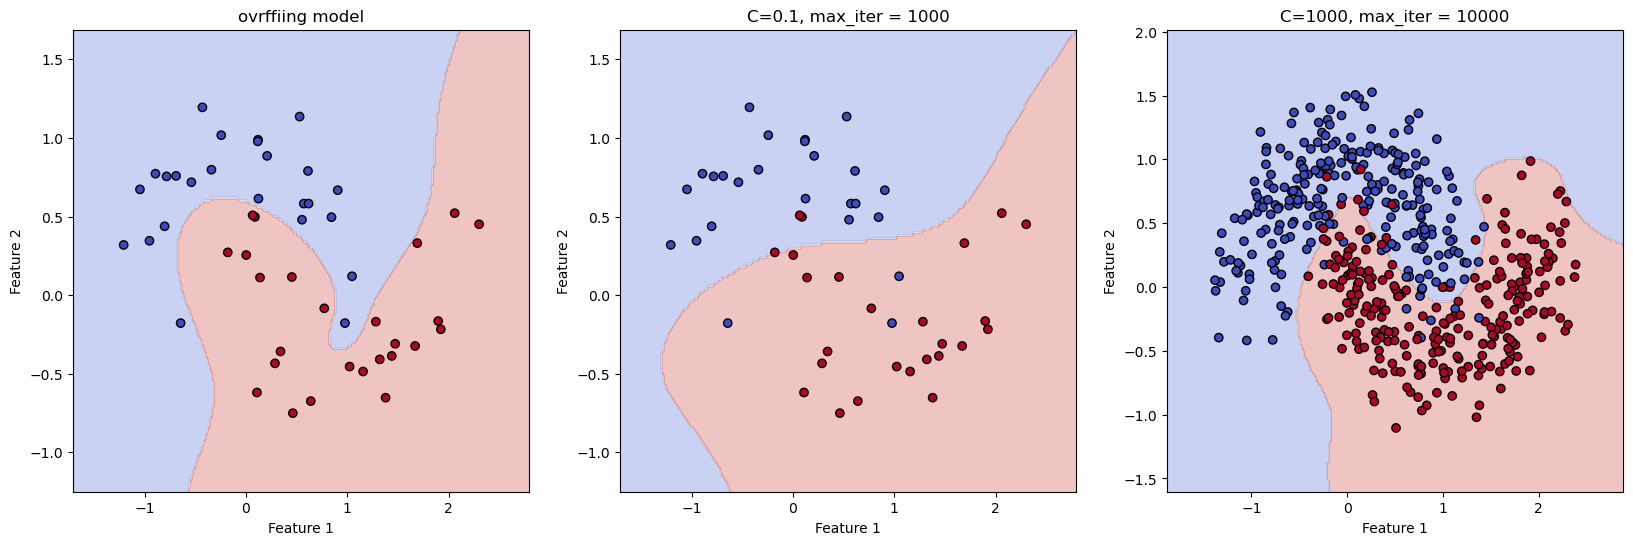

In [5]:
# 과적합모델
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
x_small, y_small = make_moons(n_samples=50, noise=0.25, random_state=45)
fig, axes = plt.subplots(1,3,figsize=(20,6))
# 고차항 특성으로 변환(과적합 유도)
poly = PolynomialFeatures(degree=10, include_bias=False)
x_poly_small =  poly.fit_transform(x_small)
#데이터 슨케일링
scaler = StandardScaler()
x_scaled_small = scaler.fit_transform(x_poly_small) #C가 규제강도. 클수록 규제를 약하게 max_iter는 학습횟수
#모델훈련(데이터 59, 약한규제)
log_reg_overfit = LogisticRegression(C=1000, max_iter=10000) #C가 규제강도. 클수록 규제를 약하게 max_iter는 학습횟수
log_reg_overfit.fit(x_scaled_small, y_small)
plot_decision_boundary(log_reg_overfit,x_small,y_small,poly,scaler,'ovrffiing model', axes[0])
#규제적용(데이터 50, 강한규제)
log_reg_regulation = LogisticRegression(C=0.1,max_iter=1000)
log_reg_regulation.fit(x_scaled_small, y_small)
plot_decision_boundary(log_reg_regulation,x_small,y_small,poly,scaler,'C=0.1, max_iter = 1000', axes[1])

#데이터를 추가(데이터 500, 약하게)
X_large, y_large = make_moons(n_samples= 500, noise=0.25, random_state=45)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly_large =  poly.fit_transform(X_large)
#데이터 슨케일링
scaler = StandardScaler()
X_scaled_large = scaler.fit_transform(X_poly_large) #C가 규제강도. 클수록 규제를 약하게 max_iter는 학습횟수
#모델훈련(데이터 59, 약한규제)
log_reg_moredata = LogisticRegression(C=1000, max_iter=10000) #C가 규제강도. 클수록 규제를 약하게 max_iter는 학습횟수
log_reg_moredata.fit(X_scaled_large, y_large)
plot_decision_boundary(log_reg_moredata,X_large,y_large,poly,scaler,'C=1000, max_iter = 10000', axes[2])

In [ ]:
# #파이프라인 적용
# from sklearn.datasets import make_moons
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# import matplotlib.pyplot as plt

# # 데이터 생성
# X_small, y_small = make_moons(n_samples=50, noise=0.25, random_state=45)
# X_large, y_large = make_moons(n_samples=500, noise=0.25, random_state=45)

# # 그래프 설정
# fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# #모델훈련(데이터 59, 약한규제)
# overfit_model = Pipeline([
#     ("poly", PolynomialFeatures(degree=10, include_bias=False)),
#     ("scaler", StandardScaler()),
#     ("log_reg", LogisticRegression(C=1000, max_iter=10000))
# ])
# overfit_model.fit(X_small, y_small)
# plot_decision_boundary(overfit_model, X_small, y_small,poly_transformer=None, scaler_transformer=None,"Overfitting Model (C=1000)", subplot_ax= axes[0])

# #규제적용(데이터 50, 강한규제)
# reg_model = Pipeline([
#     ("poly", PolynomialFeatures(degree=10, include_bias=False)),
#     ("scaler", StandardScaler()),
#     ("log_reg", LogisticRegression(C=0.1, max_iter=1000))
# ])
# reg_model.fit(X_small, y_small)
# plot_decision_boundary(reg_model, X_small, y_small,poly_transformer=None, scaler_transformer=None, title="Regularized Model (C=0.1)", subplot_ax= axes[1])

# #데이터를 추가(데이터 500)
# moredata_model = Pipeline([
#     ("poly", PolynomialFeatures(degree=10, include_bias=False)),
#     ("scaler", StandardScaler()),
#     ("log_reg", LogisticRegression(C=1000, max_iter=10000))
# ])
# moredata_model.fit(X_large, y_large)
# plot_decision_boundary(moredata_model, X_large, y_large, poly_transformer=None, scaler_transformer=None, title="More Data (C=1000)",subplot_ax= axes[2])

# plt.tight_layout()
# plt.show()


SyntaxError: positional argument follows keyword argument (2121357811.py, line 22)

#### ROC, AUC
```
정확도 99% 하지만... 데이터가 불균형이라면 좋은 척도가 못된다 ROC AUC 얼마나 안정적으로 좋은 성능을 내는지를 종합적으로 시각화
모델이 예측한 확률을 기반으로 분류기준점(Threshold)을 계속해서 모델의 성능이 어떻게 변하는지 하나의 곡선으로
```
#### ROC 구성요소 TPR FPR
```
혼동행렬( P: 1 , N:0 P:암환자, n:정상) 뒤에있는게 positive, negative가 모델 예측
 TP: 진짜 암인환자를 암이라고 예측 정답
 FN: 진짜 암인환자를 정상으로 예측 놓친 암환자
 FP: 정상인 사람을 암이라고 예측 : 잘못된 예측
 TN: 정상인 사람을 정상: 정답

 ROC 곡선의 x 와 y축
 y축 : 진짜를 얼마나 잘 찾았나 TPR(True Positive Rate) 실제 양성인 데이터 중에서 모델이 양성으로 올바르게 예측한 비율
 TPR: 민감도 또는 재현율 
 실제로 암인데 암이라고 예측 /실제 모든 암 환자수
 TPR = TP/TP+FN

 X츅 : 가짜를 얼마나 잘못찾았냐.. FPR
 FPR = FP(정상인데암이라고 예측)/FP+TN(실제 모든 정상인수)
 ```
 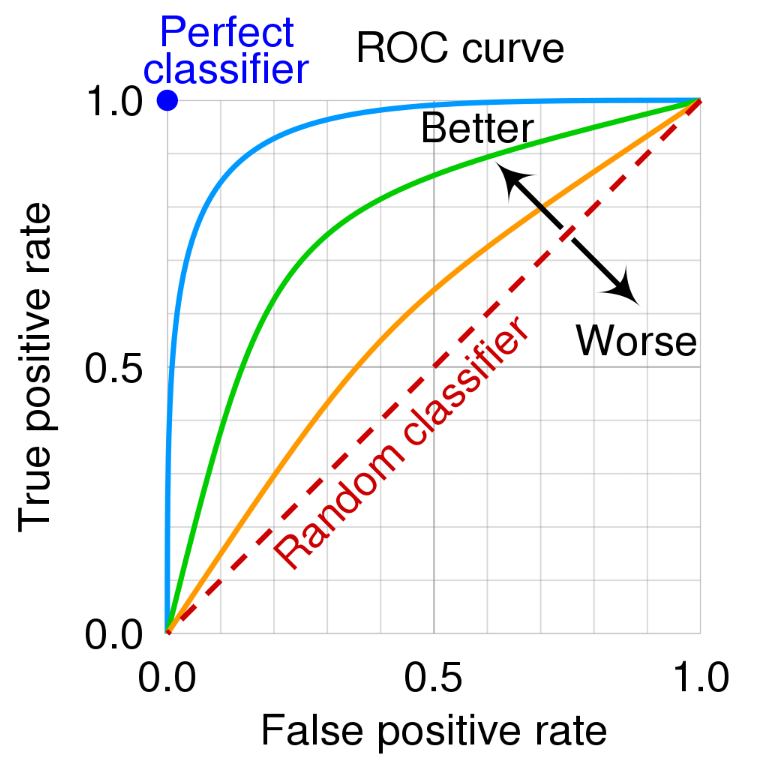
#### AUC (Area Under The Curve)
```
ROC 곡선 아래의 면접
1: 완벽한 모델 ROC가 좌측상단에 붙어있는 모양
0.5 : 무작위로 찍는것과 같은.. 즉.. 랜덤하게 예측하는 수준ROC 대각선 직선
<0.5 : 예측을 반대로.. 잘못된 모델 
```

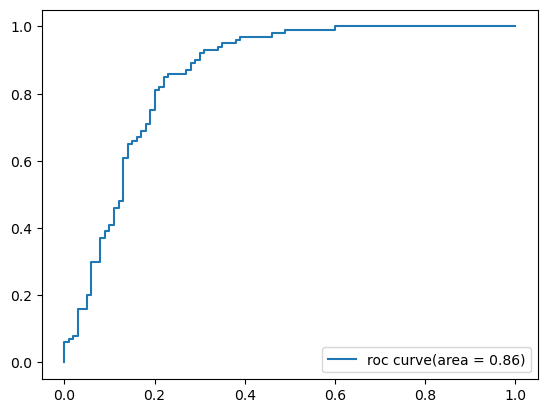

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       100
           1       0.80      0.81      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt
X,y = make_classification(n_samples=1000, n_features=20, n_informative=5,
                    n_redundant=0, random_state=42)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)
model = LogisticRegression()
model.fit(X_train,y_train) 
y_pred_proba = model.predict_proba(X_test)[:,1] #양성 클래스의 확률

#ROC AUC
#실제값과 예측 확률을 사용 FPR TPR
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)
# fpr tpr 이용 auc를 계산
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,label = f'roc curve(area = {roc_auc:.2f})')
plt.legend()
plt.show()

print(classification_report(y_test,model.predict(X_test)))